# Kipr personal toolbox speed checks


In [2]:
import kipr as kp
import numpy as np

## Addition

In [2]:
shape = (10, 10, 10, 10, 10, 10)
a, b = kp.arr('randn', shape=shape), kp.arr('randn', shape=shape)
%timeit a + b

a, b = np.random.randn(*shape).astype(np.float32), np.random.randn(*shape).astype(np.float32)
%timeit a + b

4.82 ms ± 342 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.47 ms ± 76.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.98 ms ± 86.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.65 ms ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
a, b = kp.arr('randn', shape=[3, 5, 3, 6, 1, 7]), kp.arr('randn', shape=[3, 6, 9, 7])
%timeit a + b
%timeit a.recadd(b)

a, b = a.numpy(), b.numpy()
%timeit (a + b).copy()

543 µs ± 34.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
537 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
73 µs ± 8.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
a, b = 1, 2
%timeit a + b

a, b = kp.arr(1), kp.arr(2)
%timeit a + b

a, b = np.array(1), np.array(2)
%timeit a + b

92 ns ± 0.767 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
1.08 µs ± 6.95 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.37 µs ± 5.27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## MatMul

In [5]:
shape = (4, 1000)
a = kp.arr('randn',  shape=shape)
b = kp.arr('randn', shape=(1000, 32))
%timeit a @ b

a, b = a.numpy(), b.numpy()
%timeit a @ b

300 µs ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
66 µs ± 969 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [01:19<00:00,  1.24it/s]


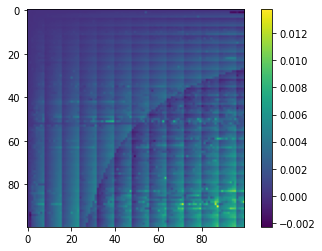

In [2]:
import matplotlib.pyplot as plt
import kipr as kp
import numpy as np
import timeit
from tqdm import tqdm


tests = 10
I = 100
K = 100
J = 100

kp_results = np.zeros((I, J))
np_results = np.zeros((I, J))

for i in tqdm(range(1, I)):
    for j in range(1, J):
        a = kp.arr('randn', shape=[i, K])
        b = kp.arr('randn', shape=[K, j])
        kp_results[i, j] = timeit.timeit(lambda: a @ b, number=tests)

        a, b = np.random.randn(i, K), np.random.randn(K, j)
        np_results[i, j] = timeit.timeit(lambda: a @ b, number=tests)


plt.imshow(kp_results-np_results)
plt.colorbar()
plt.show()

plt.imshow(kp_results/np_results)
plt.colorbar()
plt.show()

## Subscript

In [4]:
shape = (10, 10, 10, 10, 10, 10)
values = np.random.randn(*shape)
values2 = np.random.randn(10000, 300, 10)

a = kp.arr(values)
b = kp.arr(values2)
print('kipr time:')
%timeit a[0], a[3, 2, 5, 2, 5, 2], a[:, ..., 1:7:2], a[[3, 2, 5, 2, 5, 2], :, 0], b[3, 2, 5], b[:, ..., 1:7:2]

a = values
b = values2
print('numpy time:')
%timeit a[0].copy(), a[3, 2, 5, 2, 5, 2].copy(), a[:, ..., 1:7:2].copy(), a[[3, 2, 5, 2, 5, 2], :, 0], b[3, 2, 5].copy(), b[:, ..., 1:7:2]

kipr time:
337 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
numpy time:
4.25 ms ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Loading from numpy array

In [3]:
shape = (10, 10, 10, 10, 10)
a = np.random.rand(*shape)
b = a.astype(np.float32)

%timeit kp.arr(a)
%timeit kp.arr(b)

33.2 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
544 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## ReLU

In [2]:
shape = (10, 10, 10, 10, 10, 10)
a = kp.arr('random', shape=shape)
%timeit kp.relu(a)

a = np.random.rand(*shape).astype(np.float32)
%timeit a * (a > 0)

1.27 ms ± 5.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.5 ms ± 76.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
